In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
#%%
import warnings
warnings.filterwarnings('ignore')



In [7]:
data = pd.read_csv(r"Salary_Data.csv") # real
data.tail()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Figure size 300x300 with 0 Axes>

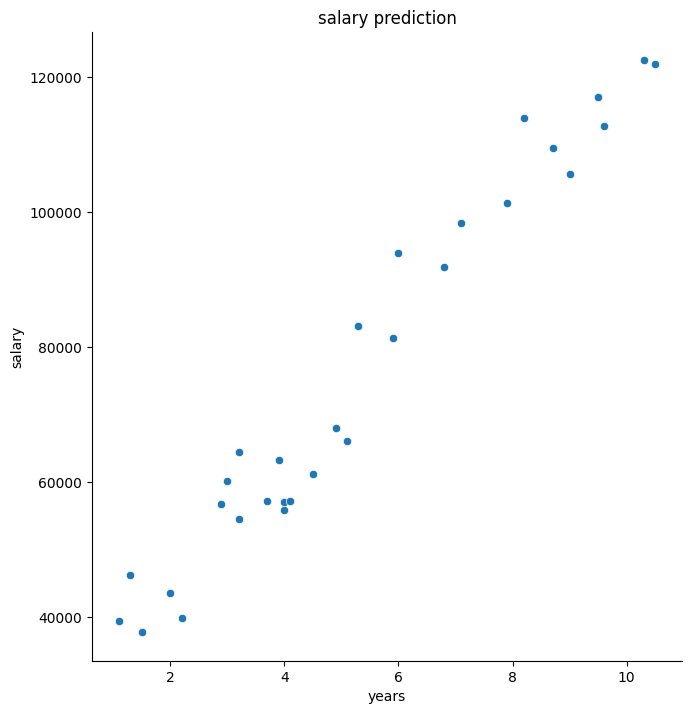

In [8]:

plt.figure(figsize=(3,3))
sns.pairplot(data,x_vars=["YearsExperience"],y_vars=["Salary"],size=7,kind="scatter")
plt.xlabel("years")
plt.ylabel("salary")
plt.title("salary prediction")
plt.show()

In [9]:
# cooking the data 
X = data.iloc[:,:-1]
y = data.iloc[:,1]

X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.8,random_state = 10)

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15)  
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_poly_pred_train = poly_model.predict(X_poly_train)
y_poly_pred_test = poly_model.predict(X_poly_test)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = poly_model.predict(X_range_poly)

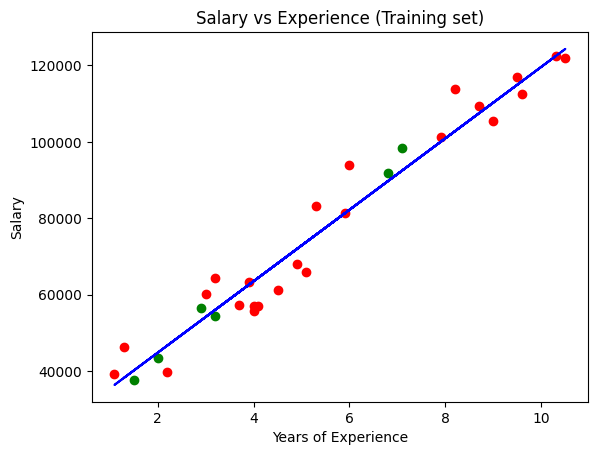

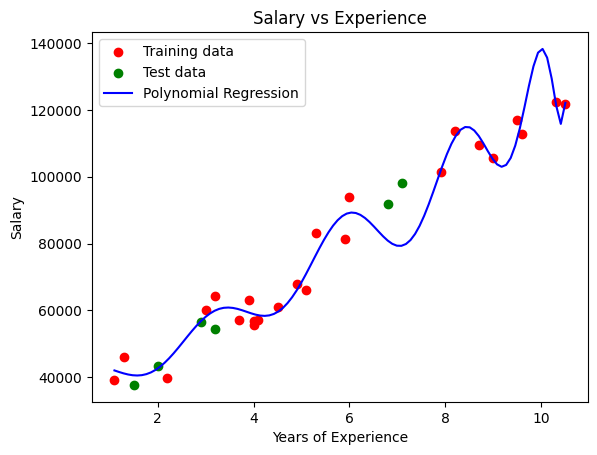

In [11]:

my_model = LinearRegression()
my_model.fit(X_train,y_train)
#%%
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_train, my_model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


plt.scatter(X_train, y_train, color='red', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_range, y_range_pred, color='blue', label='Polynomial Regression')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()



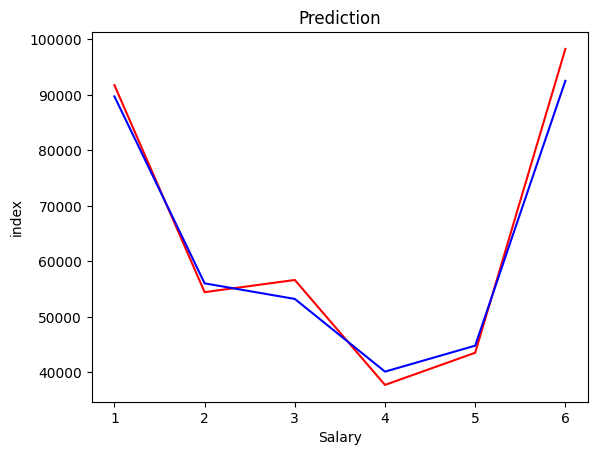

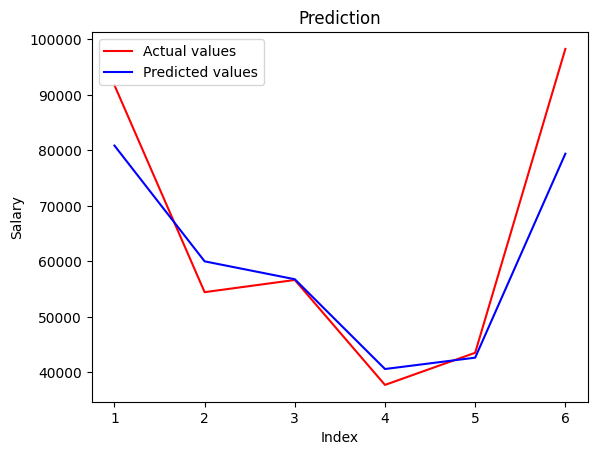

In [12]:
y_pred = my_model.predict(X_test)
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()
#%%
c = [i for i in range(1, len(y_test) + 1)]
plt.plot(c, y_test, color='r', linestyle='-', label='Actual values')
plt.plot(c, y_poly_pred_test, color='b', linestyle='-', label='Predicted values')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Prediction')
plt.legend()
plt.show()


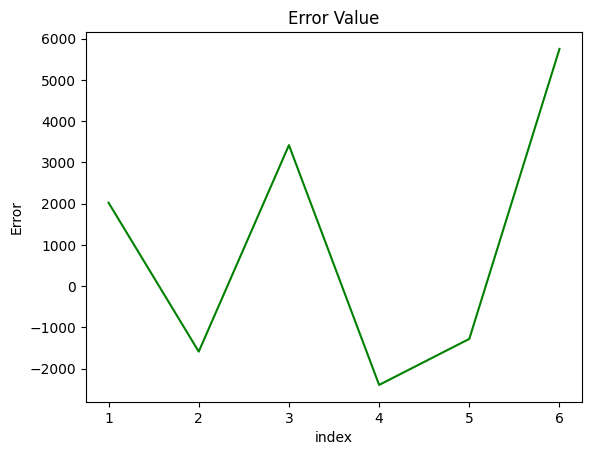

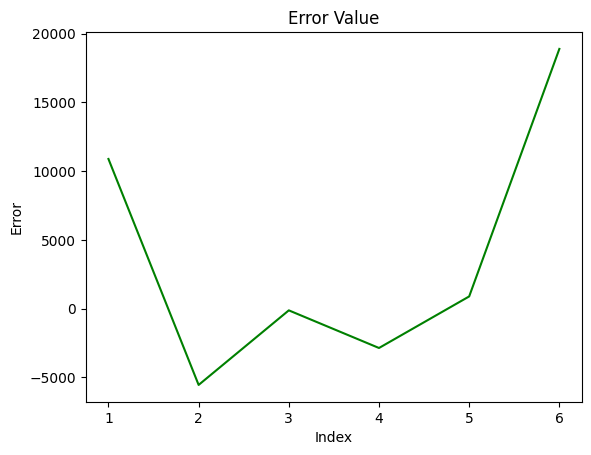

In [13]:
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test - y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

plt.plot(c, y_test - y_poly_pred_test, color='green', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [14]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('R² score :',rsq)
#%%
# Intecept and coeff of the line
print('Intercept of the model:',my_model.intercept_)
print('Coefficient of the line:',my_model.coef_)

y_hat = 9356 * 4.5 +  26089 
print(y_hat)
print('################################################')
print('*************************************************\n')

mse = mean_squared_error(y_test, y_poly_pred_test)
rsq = r2_score(y_test, y_poly_pred_test)
print('Mean Squared Error:', mse)
print('R² score:', rsq)

print('Intercept of the model:', poly_model.intercept_)
print('Coefficients of the model:', poly_model.coef_)


y_hat = poly_model.predict(poly.transform([[4.5]]))
print('Predicted Salary for 4.5 years of experience:', y_hat[0])


mean squared error : 9785570.138914317
R² score : 0.9816423482070253
Intercept of the model: 26089.096632416724
Coefficient of the line: [9356.86299354]
68191.0
################################################
*************************************************

Mean Squared Error: 85787507.86127603
R² score: 0.8390633171958327
Intercept of the model: 44857.62581380208
Coefficients of the model: [ 0.00000000e+00 -2.46033625e+02 -6.15396743e+02 -1.01079120e+03
 -1.08873366e+03 -3.65002881e+02  9.64927924e+02  9.24563376e+02
 -1.39484976e+03  6.93653597e+02 -1.87691434e+02  3.10845352e+01
 -3.24824518e+00  2.09622542e-01 -7.64634741e-03  1.20784699e-04]
Predicted Salary for 4.5 years of experience: 59536.50545485814


In [15]:
age_exp=float(input('inter your  years experience ' ))

In [16]:
y_hat = 9356 * age_exp +  26089 
print('your salary expect regarding for your number of age eperience is  :  ',y_hat)

your salary expect regarding for your number of age eperience is  :   44801.0


Years of Experience: 1.0, Predicted Salary: 42560.309784281984
Years of Experience: 3.0, Predicted Salary: 58090.38046835859
Years of Experience: 4.5, Predicted Salary: 59536.50545485814
Years of Experience: 7.8, Predicted Salary: 97689.24776204427
Years of Experience: 9.8, Predicted Salary: 130999.06526692708


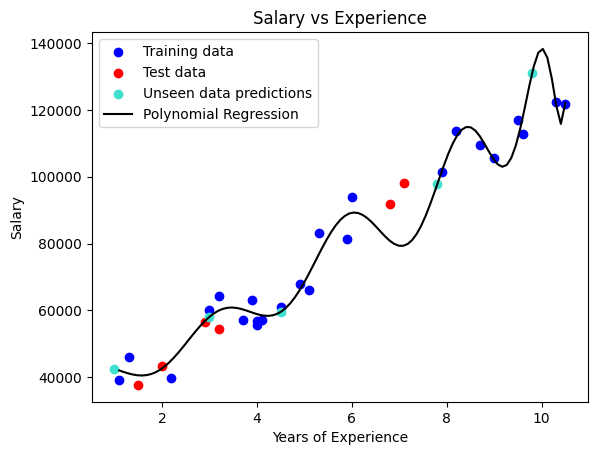

In [17]:
unseen_data = np.array([[1], [3], [4.5], [7.8], [9.8]])  
unseen_data_poly = poly.transform(unseen_data)
unseen_predictions = poly_model.predict(unseen_data_poly)

for years, salary in zip(unseen_data, unseen_predictions):
    print(f"Years of Experience: {years[0]}, Predicted Salary: {salary}")
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.scatter(unseen_data, unseen_predictions, color='turquoise', label='Unseen data predictions')
plt.plot(X_range, y_range_pred, color='black', label='Polynomial Regression')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()